In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [2]:
data=pd.read_csv('indian_liver_patient.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio']=data.fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Gender']=lc.fit_transform(data['Gender'])

In [9]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.000000


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


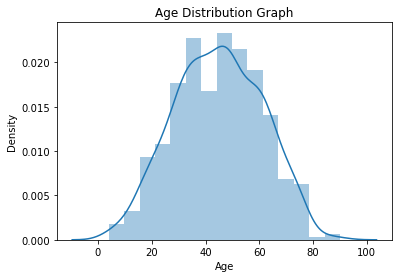

In [10]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dataset', ylabel='count'>

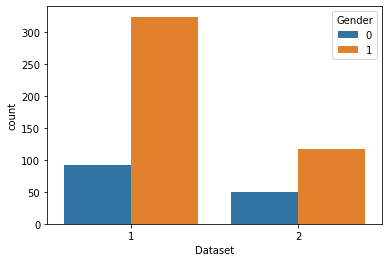

In [11]:
sns.countplot(data['Dataset'], hue=data['Gender'])

<AxesSubplot:>

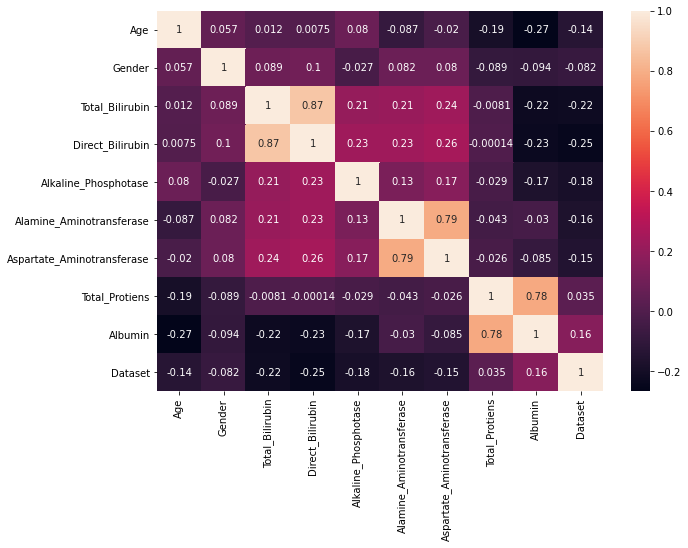

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [13]:
x=data.iloc[:,:-1]
y=data.Dataset

In [14]:
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)

In [15]:
x_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,1.252098
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,1.066637
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,1.066637
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.819356
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,1.684839


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [17]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


In [18]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [19]:
y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [20]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [21]:
y_train_smote.value_counts()

1    329
2    329
Name: Dataset, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train_smote,y_train_smote)
y_predict=model1.predict(x_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.85      0.79      0.82        87
           2       0.50      0.60      0.55        30

    accuracy                           0.74       117
   macro avg       0.68      0.70      0.68       117
weighted avg       0.76      0.74      0.75       117



In [24]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(x_train_smote,y_train_smote)
y_predict=model4.predict(x_test)
dtc1=accuracy_score(y_test,y_predict)
dtc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.83      0.75      0.79        87
           2       0.44      0.57      0.49        30

    accuracy                           0.70       117
   macro avg       0.63      0.66      0.64       117
weighted avg       0.73      0.70      0.71       117



In [25]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train_smote,y_train_smote)
y_predict=model2.predict(x_test)
knn1=(accuracy_score(y_test,y_predict))
knn1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.86      0.55      0.67        87
           2       0.36      0.73      0.48        30

    accuracy                           0.60       117
   macro avg       0.61      0.64      0.58       117
weighted avg       0.73      0.60      0.62       117



In [26]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(x_train_smote,y_train_smote)
y_predict=model5.predict(x_test)
logi1=accuracy_score(y_test,y_predict)
logi1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.96      0.61      0.75        87
           2       0.45      0.93      0.61        30

    accuracy                           0.69       117
   macro avg       0.71      0.77      0.68       117
weighted avg       0.83      0.69      0.71       117



In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
classifier=Sequential()

In [30]:
classifier.add(Dense(units=100,activation='relu',input_dim=10))

In [31]:
classifier.add(Dense(units=50,activation='relu'))

In [32]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [33]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model_history=classifier.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 6s 334ms/step - loss: 0.5655 - accuracy: 0.5457 - val_loss: 0.3903 - val_accuracy: 0.7128
Epoch 2/100
4/4 [==============================] - 0s 49ms/step - loss: 0.3383 - accuracy: 0.7016 - val_loss: 0.1768 - val_accuracy: 0.7234
Epoch 3/100
4/4 [==============================] - 0s 67ms/step - loss: 0.1229 - accuracy: 0.7016 - val_loss: -0.0203 - val_accuracy: 0.7234
Epoch 4/100
4/4 [==============================] - 0s 120ms/step - loss: -0.0715 - accuracy: 0.7016 - val_loss: -0.2153 - val_accuracy: 0.7234
Epoch 5/100
4/4 [==============================] - 0s 50ms/step - loss: -0.2685 - accuracy: 0.7016 - val_loss: -0.4114 - val_accuracy: 0.7234
Epoch 6/100
4/4 [==============================] - 0s 75ms/step - loss: -0.4779 - accuracy: 0.7016 - val_loss: -0.6093 - val_accuracy: 0.7234
Epoch 7/100
4/4 [==============================] - 0s 62ms/step - loss: -0.6853 - accuracy: 0.7016 - val_loss: -0.8169 - val_accuracy: 0.7234
Epoch 8/1

Epoch 58/100
4/4 [==============================] - 0s 52ms/step - loss: -202.7739 - accuracy: 0.7016 - val_loss: -216.0812 - val_accuracy: 0.7234
Epoch 59/100
4/4 [==============================] - 0s 46ms/step - loss: -215.0437 - accuracy: 0.7016 - val_loss: -228.9136 - val_accuracy: 0.7234
Epoch 60/100
4/4 [==============================] - 0s 52ms/step - loss: -227.9308 - accuracy: 0.7016 - val_loss: -242.1610 - val_accuracy: 0.7234
Epoch 61/100
4/4 [==============================] - 0s 44ms/step - loss: -240.6215 - accuracy: 0.7016 - val_loss: -256.1966 - val_accuracy: 0.7234
Epoch 62/100
4/4 [==============================] - 0s 103ms/step - loss: -253.9845 - accuracy: 0.7016 - val_loss: -270.8265 - val_accuracy: 0.7234
Epoch 63/100
4/4 [==============================] - 0s 47ms/step - loss: -268.0732 - accuracy: 0.7016 - val_loss: -285.8731 - val_accuracy: 0.7234
Epoch 64/100
4/4 [==============================] - 0s 61ms/step - loss: -282.9185 - accuracy: 0.7016 - val_loss: -30

In [35]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\ELCOT\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [36]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\ELCOT\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [37]:
classifier.save("liver.h5")

In [38]:
y_pred=classifier.predict(x_test)

4/4 [==============================] - 0s 7ms/step


In [39]:
y_pred

array([[1.        ],
       [1.        ],
       [0.99999976],
       [1.        ],
       [0.99999976],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999976],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [40]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [41]:
def predict_exit(sample_value):
    sample_value=np.array(sample_value)
    sample_value=sample_value.reshape(1,-1)
    sample_value=scale(sample_value)
    return classifier.predict(sample_value)

In [42]:
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
    print('Prediction:Liver Patient')
else:
    print('Prediction:Healthy')

1/1 [==============================] - 0s 313ms/step
Prediction:Liver Patient


In [43]:
acc_smote=[['KNN Classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_smote,columns=['classification models','accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.598291
1,RandomForestClassifier,0.743590
2,DecisionTreeClassifier,0.700855
3,LogisticRegression,0.692308


<AxesSubplot:title={'center':'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

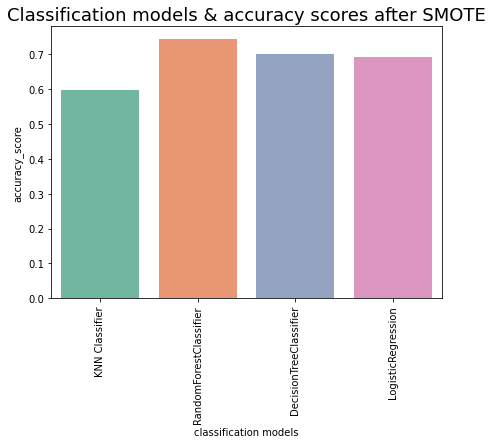

In [44]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models",y="accuracy_score",data=Liverpatient_pred,palette="Set2")

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [46]:
model.feature_importances_

array([0.10560915, 0.02985332, 0.1103418 , 0.10634523, 0.11936243,
       0.11268975, 0.11117803, 0.09780996, 0.10114212, 0.1056682 ])

In [47]:
dd=pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(0,ascending=False)
dd

,0
Alkaline_Phosphotase,0.119362
Alamine_Aminotransferase,0.112690
Aspartate_Aminotransferase,0.111178
Total_Bilirubin,0.110342
Direct_Bilirubin,0.106345
Albumin_and_Globulin_Ratio,0.105668
Age,0.105609
Albumin,0.101142
Total_Protiens,0.097810
Gender,0.029853


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

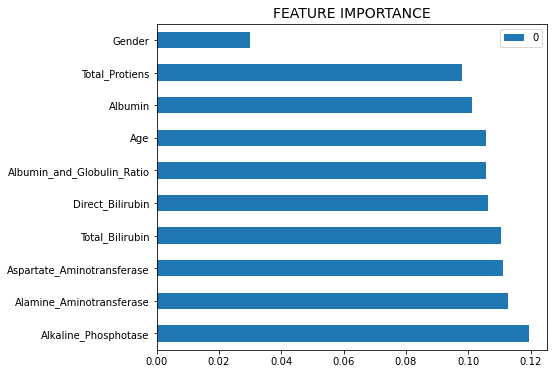

In [48]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [49]:
import joblib
joblib.dump(model1,'ETC.pkl')

['ETC.pkl']

In [ ]:
from flask import Flask,render_template,request
import numpy as np
import pickle

In [ ]:
app=Flask(__name__)
@app.route('/')
def home():
    return render_template('home.html')
@app.route('/predict')
def index():
    return render_template('predict.html')

In [ ]:
@app.route('/data_predict',methods=['POST'])
def predict():
    Age=request.form['Age']
    Gender=request.form['Gender']
    tb=request.form['tb']
    db=request.form['db']
    ap=request.form['ap']
    aa1=request.form['aa1']
    aa2=request.form['aa2']
    tp=request.form['tp']
    a=request.form['a']
    agr=request.form['agr']
    data=[[float(Age),float(Gender),float(tb),float(db),float(ap),float(aa1),float(aa2),float(tp),float(a),float(agr)]]
    model=pickle.load(open('ETC.pkl','rb'))
    prediction=model.predict(data)[0]
    if(prediction == 1):
        return render_template('noChance.html',prediction='You have a liver disease problem,You must and should consult a doctor.Take care')
    else:
        return render_template('chance.html',prediction='You dont have a liver disease problems')
if __name__=='__main__':
        app.run()
